In [155]:
"""
Hi HT,
The comments in the cells below are the explanation about the experiments and some observation as well
Please check. Thanks!
"""

''

In [98]:
# Modules
from glob import glob
from matplotlib import pyplot as plt
from functools import reduce
import os
import requests
from IPython.display import Image
%matplotlib inline

In [71]:
"""
Graphing function. Given artificial data and algorithm type, draw the graphs
    Arguments: 
        expnum: experiment data number. Only 0 and 3 available now
                Data set #0 is a 100*100 full rating matrix, with 13 latent dimension
                Data set #0 is a 100*100 full rating matrix, with 30 latent dimension
                
        exptype: experiment algorithms. The following list is the algorithm available now:
            [mf]: Matrix factorization
            [ucbmf]: Our proposed algorithm which uses LinUCB algorithm with contextual vectors from mf latent 
                   features (after feature transform). Note that after feature transform, the contextual features 
                   get much longer (about 300-dimension in expnum #0)
                   For example, if we have a latent vector of user a, U(a) = [u1, u2] and 
                   a latent vector of item b, V(b) = [v1, v2]
                   The contextual feature vector will be [1, u1, u2, v1, v2, u1v1, u1v2, u2v2]
                   This feature vector is put into LinUCB algorithm to train a bandit for recommending. 
                   
            [ucbmf_latentkernel]: Similar to ucbmf, but the context feature is shortened. Under the example above, 
                                the contextual feature vector will be [u1v1, u2v2]
            
            [bewareU]: Algorithm proposed in our competing paper "Bandits Warm-up Cold Recommender Systems"
                     Recommending with fixed item latent vector, use user latent vector as contextual features
                     to train a bandit.
            
            [bewareV]: Another algorithm proposed in our competing paper "Bandits Warm-up Cold Recommender Systems"
                     Recommending with fixed user latent vector, use item latent vector as contextual features
                     to train a bandit
                     
        resulttype: Reward or regret
        
        interval: Interval of data to calculate average. 
                  Set interval being 1 to show the data of each data point. (Ragged)
                  or set interval being 50 for a smoother graph. 
        
        cumulated: Graphing for cumulated or separated data.
        
        alpha: Alpha parameter in LinUCB, which control the "uncertainty" level of bandit

"""

def plot_data(expnum, exptype, resulttype, interval, cumulated, alpha):
    if alpha == -1:
        filepath = glob("./result/*_" + exptype + "_" + str(expnum) + "_" + resulttype + ".dat")
        alpha = 0.05
    else:
        filepath = glob("./result/*_" + exptype + "_" + str(expnum) + "_{:1.4f}_".format(alpha) + resulttype + ".dat")
    r_interval = [0 for i in range(0,10000,interval)]
    for f in filepath:
        fp = open(f)
        r = list(map(lambda x: float(x), fp.readlines()))
        tmp = [reduce(lambda x, y: x + y, r[i:i + interval]) / float(interval) for i in range(0, 10000, interval)]
        r_interval = [r_interval[i] + tmp[i] for i in range(0,len(r_interval))]
    r_interval = list(map(lambda x:x/len(filepath), r_interval))
    if cumulated == 1:
        for i in range(len(r_interval)):
            r_interval[i] = r_interval[i] + r_interval[i - 1] if i > 0 else r_interval[i]
    r_line = plt.plot(r_interval, label="exp:{},{}_{}_{:1.4f}".format(expnum, exptype, resulttype, alpha))

In [157]:
"""
Function to convert Latex-style math terms into images. Images are saved in img/[fname].png

Arguments: 
    term: Mathematical term
    fname: image name
"""

def term_as_file(term, fname):
    tfile = 'img/{}.png'.format(fname)
    r = requests.get( 'http://latex.codecogs.com/png.latex?\dpi{300} \ %s' % term )
    f = open( tfile, 'wb' )
    f.write( r.content )
    f.close()

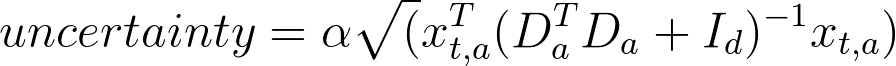

In [158]:
"""
According to LinUCB, with a probability of 1 - delta, the
error of bandit prediction will falls inside uncertainty range
"""
term = 'uncertainty= \\alpha\\sqrt(x^T_{t,a}(D^T_aD_a+I_d)^{-1}x_{t,a})'
filename = "uncertainty"
term_as_file(term, filename)
Image(filename='img/{}.png'.format(filename)) 

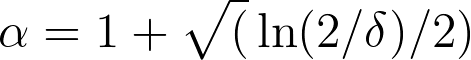

In [142]:
"""
alpha value is derived from a parameter "delta"
"""

term = '\\alpha=1+\\sqrt(\\ln(2/\\delta)/2)'
filename = "alpha"
term_as_file(term, filename)
Image(filename='img/{}.png'.format(filename)) 

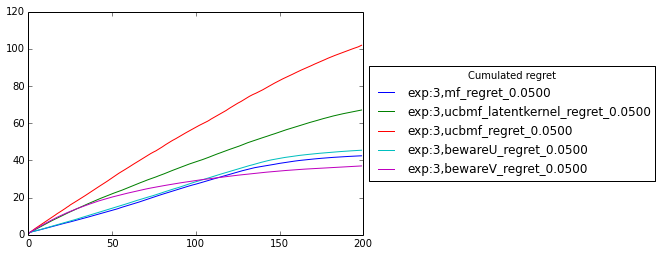

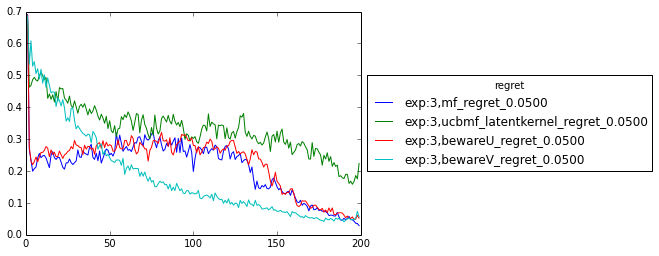

In [111]:
"""
Experiments on regret and cumulated regret.
We can see that ucbmf and ucbmf_latentkernel have higher regret than other algorithms. So sad......
Note that ucbmf perform even worse than ucbmf_latentkernel(first graph below). Moreover, ucbmf performs 
consistently worse than ucbmf_latentkernel in all the experiments below, so from now on, we only show 
results of ucbmf_latentkernel in the following graphs
It seems that a much longer contextual features perform bad under such setting.
"""

expnum = 3
resulttype = "regret"
interval = 50
cumulated = 1
alpha = -1
title = "Cumulated {}".format(resulttype) if cumulated == 1 else resulttype
plot_data(expnum, "mf", resulttype, interval, cumulated, alpha)
plot_data(expnum, "ucbmf_latentkernel", resulttype, interval, cumulated, alpha)
plot_data(expnum, "ucbmf", resulttype, interval, cumulated, alpha)
plot_data(expnum, "bewareU", resulttype, interval, cumulated, alpha)
plot_data(expnum, "bewareV", resulttype, interval, cumulated, alpha)
plt.legend(loc='center left', title=title, bbox_to_anchor=(1, 0.5))
plt.show()

expnum = 3
resulttype = "regret"
interval = 50
cumulated = 0
alpha = -1
title = "Cumulated {}".format(resulttype) if cumulated == 1 else resulttype
plot_data(expnum, "mf", resulttype, interval, cumulated, alpha)
plot_data(expnum, "ucbmf_latentkernel", resulttype, interval, cumulated, alpha)
plot_data(expnum, "bewareU", resulttype, interval, cumulated, alpha)
plot_data(expnum, "bewareV", resulttype, interval, cumulated, alpha)
plt.legend(loc='center left', title=title, bbox_to_anchor=(1, 0.5))
plt.show()


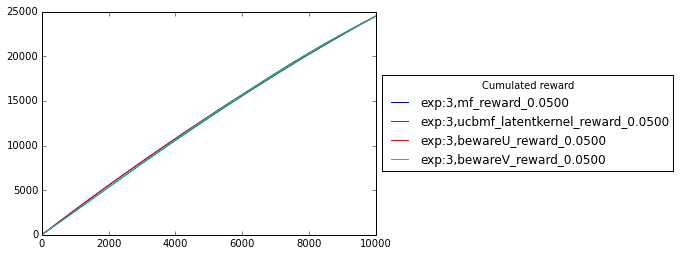

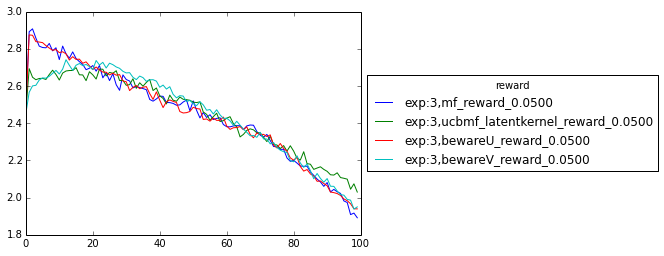

In [146]:
"""
Experiments on reward and cumulated reward.
We can see that graphs of all experiments are nearly overlapping with each other regarding cumulated reward.
However, in reward graph, we can see that the reward of ucbmf_latenkernel performs worse in the beginning, 
then gradually catches up with others and finally, overtake others in the end of the recommending.
However, though ucbmf_latentkernel obtains more rewards in last 2000 recommending, it does not mean that
ucbmf_latentkernel is good. It may just be the "bonus" of ucbmf_latentkernel missing out some good recommending in the 
beginning.
Such advantage is not quite pratical since we never being able to reach a rating matrix of 80% full. 


"""
expnum = 3
resulttype = "reward"
interval = 1
cumulated = 1
alpha = -1
title = "Cumulated {}".format(resulttype) if cumulated == 1 else resulttype
plot_data(expnum, "mf", resulttype, interval, cumulated, alpha)
plot_data(expnum, "ucbmf_latentkernel", resulttype, interval, cumulated, alpha)
plot_data(expnum, "bewareU", resulttype, interval, cumulated, alpha)
plot_data(expnum, "bewareV", resulttype, interval, cumulated, alpha)
plt.legend(loc='center left', title=title, bbox_to_anchor=(1, 0.5))
plt.show()

expnum = 3
resulttype = "reward"
interval = 100
cumulated = 0
alpha = -1
title = "Cumulated {}".format(resulttype) if cumulated == 1 else resulttype
plot_data(expnum, "mf", resulttype, interval, cumulated, alpha)
plot_data(expnum, "ucbmf_latentkernel", resulttype, interval, cumulated, alpha)
plot_data(expnum, "bewareU", resulttype, interval, cumulated, alpha)
plot_data(expnum, "bewareV", resulttype, interval, cumulated, alpha)
plt.legend(loc='center left', title=title, bbox_to_anchor=(1, 0.5))
plt.show()

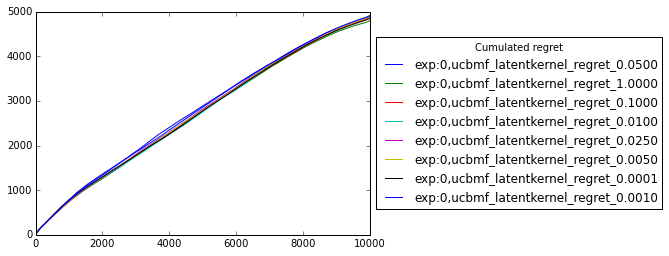

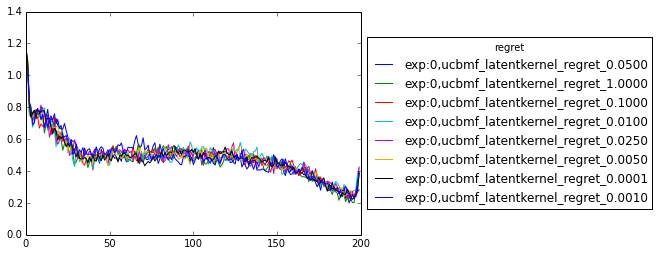

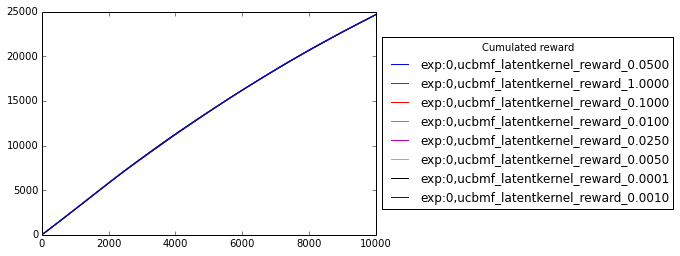

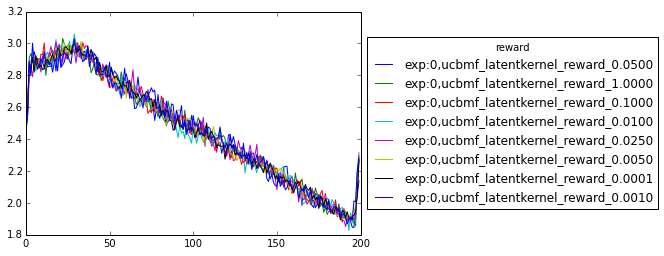

In [149]:
"""
Experiment on different level of alpha on ucbmf_latentkernel
The alpha value here is derived from the paper of LinUCB (see the formula above)
That is, I changed from different level of delta (so that alpha changed accordingly) and see if it 
makes any change to our curve.
However, from the graphs below, it is hard to tell which delta value is significantly performing 
better than others.
Only in the graph of cumulated regret(the first graph below) can we find a slightly lower regret 
curve with delta 0.0001(the black one). Note that the smaller delta value results in higher 
alpha, i.e. higher uncertainty level. It seems to match our original idea that higher uncertainty
level is good for "exploring" better recommending

Still, their differences are too small to make noticable improvement in our algorithm, which drives me mad.
I found that it since the formula to compute delta to alpha have a log function inside, which reduces the
difference between alpha. For example, having delta1 = 1, delta2 = 0.0001. We can calculate 
the corresponding alpha value.
alpha1 = 1 + sqrt(ln(2/delta1)/2) = 1.59
alpha2 = 1 + sqrt(ln(2/0.0001)/2) = 3.2
hmm.......It may explain something.
Although the delta have its probabilistic meaning, in I'm running on other experiments 
that directly change between different value of alpha to see if there is more improvement 
on higher uncertainty level.


"""
expnum = 0
resulttype = "regret"
interval = 1
cumulated = 1
alpha_list = list(set(map(lambda x:float(x.split("_")[4]), glob("result/*_ucbmf_latentkernel_0_*_*.dat"))))
for alpha in alpha_list:
    plot_data(expnum, "ucbmf_latentkernel", resulttype, interval, cumulated, alpha)

title = "Cumulated {}".format(resulttype) if cumulated == 1 else resulttype
plt.legend(loc='center left', title=title, bbox_to_anchor=(1, 0.5))
plt.show()

expnum = 0
resulttype = "regret"
interval = 50
cumulated = 0
alpha_list = list(set(map(lambda x:float(x.split("_")[4]), glob("result/*_ucbmf_latentkernel_0_*_*.dat"))))
for alpha in alpha_list:
    plot_data(expnum, "ucbmf_latentkernel", resulttype, interval, cumulated, alpha)

title = "Cumulated {}".format(resulttype) if cumulated == 1 else resulttype
plt.legend(loc='center left', title=title, bbox_to_anchor=(1, 0.5))
plt.show()

expnum = 0
resulttype = "reward"
interval = 1
cumulated = 1
alpha_list = list(set(map(lambda x:float(x.split("_")[4]), glob("result/*_ucbmf_latentkernel_0_*_*.dat"))))
for alpha in alpha_list:
    plot_data(expnum, "ucbmf_latentkernel", resulttype, interval, cumulated, alpha)

title = "Cumulated {}".format(resulttype) if cumulated == 1 else resulttype
plt.legend(loc='center left', title=title, bbox_to_anchor=(1, 0.5))
plt.show()

expnum = 0
resulttype = "reward"
interval = 50
cumulated = 0
alpha_list = list(set(map(lambda x:float(x.split("_")[4]), glob("result/*_ucbmf_latentkernel_0_*_*.dat"))))
for alpha in alpha_list:
    plot_data(expnum, "ucbmf_latentkernel", resulttype, interval, cumulated, alpha)

title = "Cumulated {}".format(resulttype) if cumulated == 1 else resulttype
plt.legend(loc='center left', title=title, bbox_to_anchor=(1, 0.5))
plt.show()

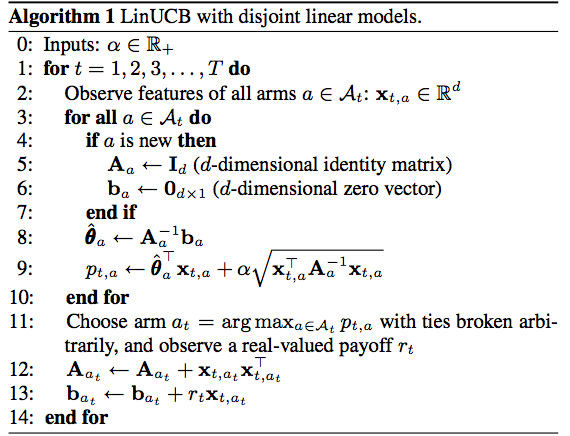

In [151]:
"""
There is a big question I don't understand here: why our algorithm perform worse than our competitor? 
It's kind of wierd because our competitor only consider half (user vector or item vector) information from 
mf so by intuition, we should beat them......
I found a slightly difference when implementing bewareU/bewareV algorithm. 
In LinUCB(see pseudo-code below), every time we receive a reward, we keep the reward and its contextual 
vector in a matrix. In my understanding, this matrix is like a "experience" matrix that keep track of the context we
seen before and also the regrets, which is the matrix A and vector b in LinUCB pseudo-code.
It's how I implement ucbmf_latentkernel.

However, in our competitor BewareU (see the pseudo-code on the second graph below)
We can see that they calculate new matrix A in every recommending, which indicates that they did not 
keep record of the contextual vectors and the regrets. It turns out to performan even better than mf.

Therefore, as thinking about why such implementation performs better even though it seems to keep less information 
to make recommendation, I'll try to imitate such strategy to see if it will imporve our ucb_latentkernel algorithm

That about all I found last week. Sorry for the delay, some symbolic links setting in my 
machine was totally unexpectedly disrupted after I update my machine last weekend so it took me a while 
to recovered the original setting. 
Please leave comments within the """  """ or via the email

Thanks! 

--Yu-Jheng



"""

Image(filename='img/LinUCB.jpg') 

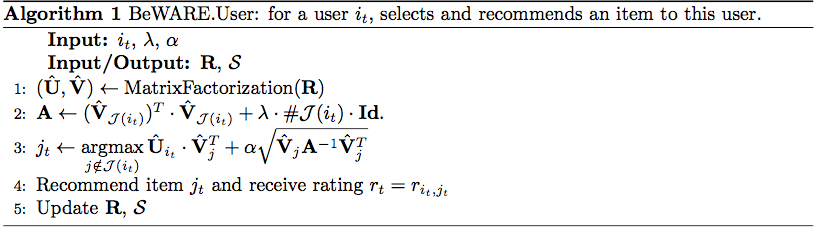

In [152]:
Image(filename='img/bewareU.jpg') 